# Q1)Consider only the below columns and prepare a prediction model for predicting Price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,Â TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [22]:
#data.to_csv('ToyotaCorolla.csv', encoding='utf-8', index=False)
#data

In [3]:
corolla=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


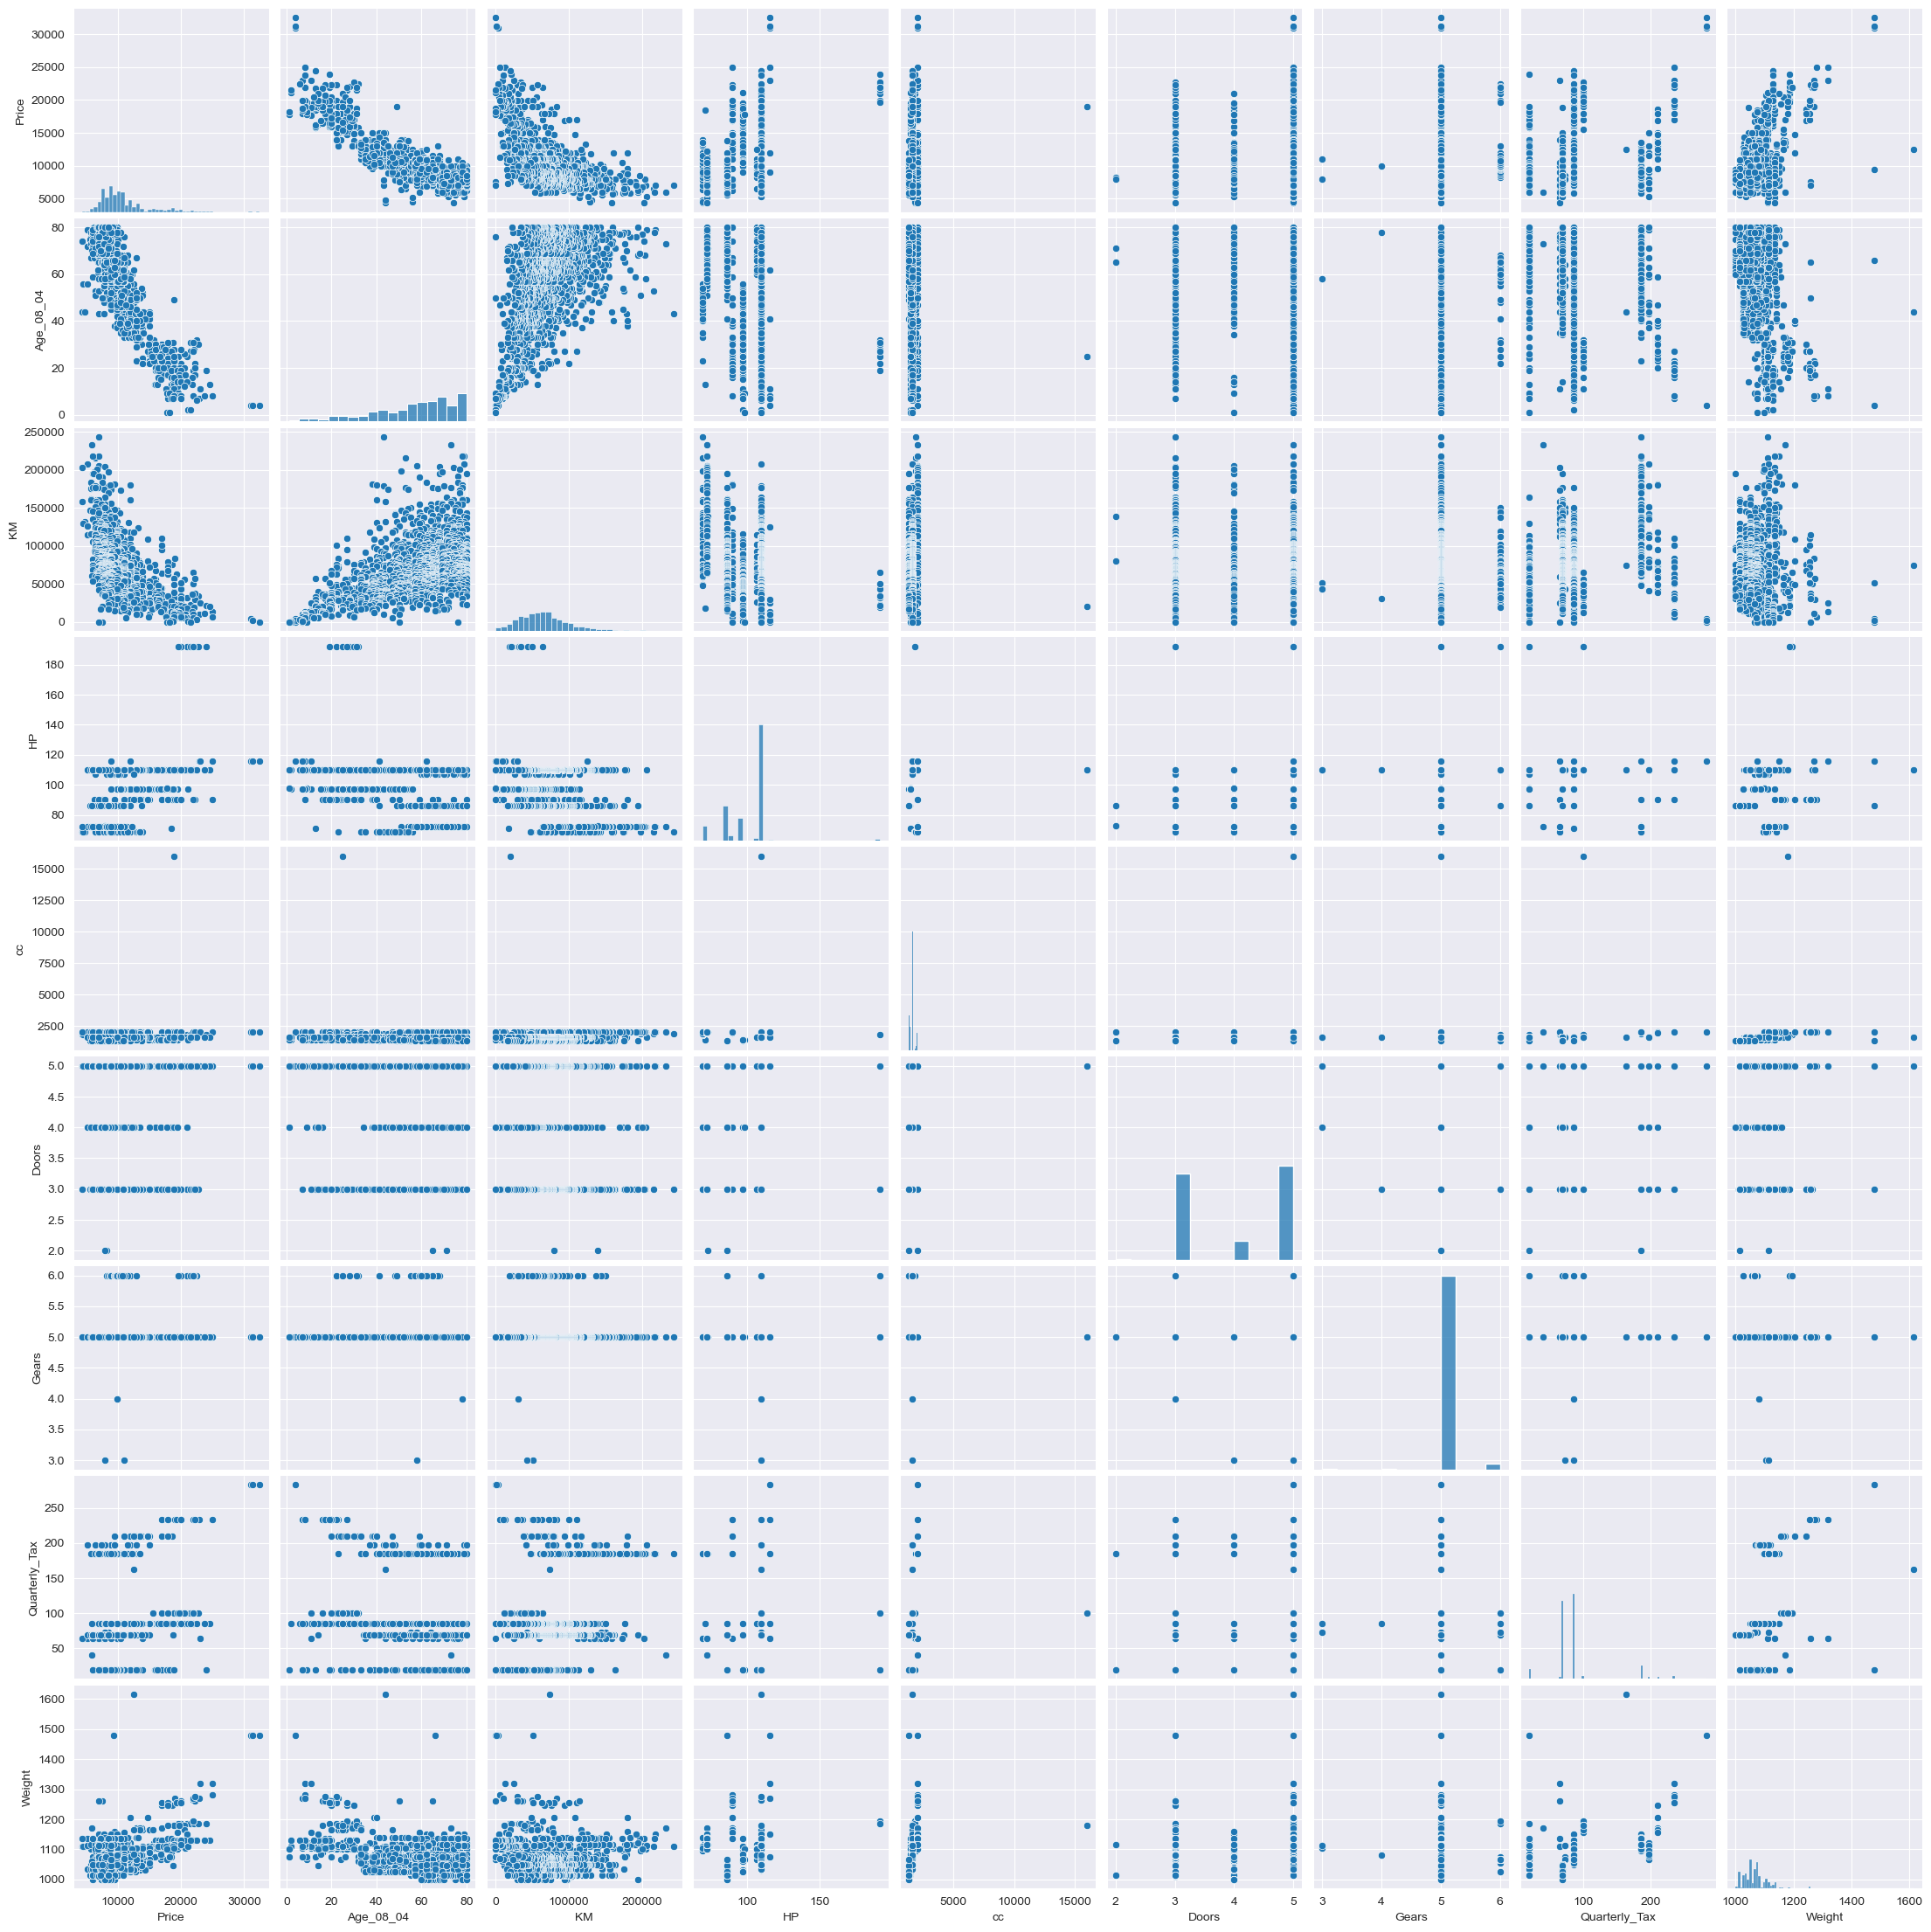

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla)

In [8]:
model = smf.ols('Price ~Age_08_04 + KM + HP + cc + Doors +  Quarterly_Tax + Weight ', data = corolla).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:34:56   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2750.5553   1059.491     -2.596      0.010   -4828.881    -672.229
Age_08_04      -121.7928      2.623    -46.439      0.000    -126.937    -116.648
KM               -0.0205      0.001    -16.395      0.000      -0.023      -0.018
HP               33.7306      2.743     12.297      0.000      28.350      39.111
cc               -0.1251      0.090     -1.385      0.166      -0.302       0.052
Doors           -24.5339     39.389     -0.623      0.533    -101.799      52.732
Quarterly_Tax     4.1227      1.312      3.141      0.002       1.548       6.697
Weight           16.9852      1.071     15.860      0.000      14.884      19.086
==============================================================================
Omnibus:                      151.778   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.853
Skew:                          -0.231   Prob(JB):                    2.54e-216
Kurtosis:                       7.047   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model2 = smf.ols('Price ~Age_08_04 + KM +   Weight ', data = corolla).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:34:56   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1880.3356    962.718     -1.953      0.051   -3768.825       8.153
Age_08_04   -120.2212      2.742    -43.841      0.000    -125.600    -114.842
KM            -0.0242      0.001    -20.142      0.000      -0.027      -0.022
Weight        19.5760      0.836     23.409      0.000      17.936      21.216
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model3 = smf.ols('Price ~Gears + Doors+cc+Quarterly_Tax', data = corolla).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     33.44
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.07e-26
Time:                        22:34:56   Log-Likelihood:                -13743.
No. Observations:                1436   AIC:                         2.750e+04
Df Residuals:                    1431   BIC:                         2.752e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2952.4097   2582.599     -1.143      0.253   -8018.495    2113.676
Gears          1758.7838    492.947      3.568      0.000     791.807    2725.761
Doors           668.1755     98.232      6.802      0.000     475.481     860.870
cc                0.4668      0.227      2.053      0.040       0.021       0.913
Quarterly_Tax    16.2026      2.352      6.889      0.000      11.589      20.816
==============================================================================
Omnibus:                      350.675   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.427
Skew:                           1.366   Prob(JB):                    8.34e-168
Kurtosis:                       5.322   Cond. No.                     4.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [12]:
c

array([8.20901150e-03, 4.53874553e-03, 6.21874851e-03, ...,
       1.53245623e-06, 7.64981483e-04, 1.19725680e-02])

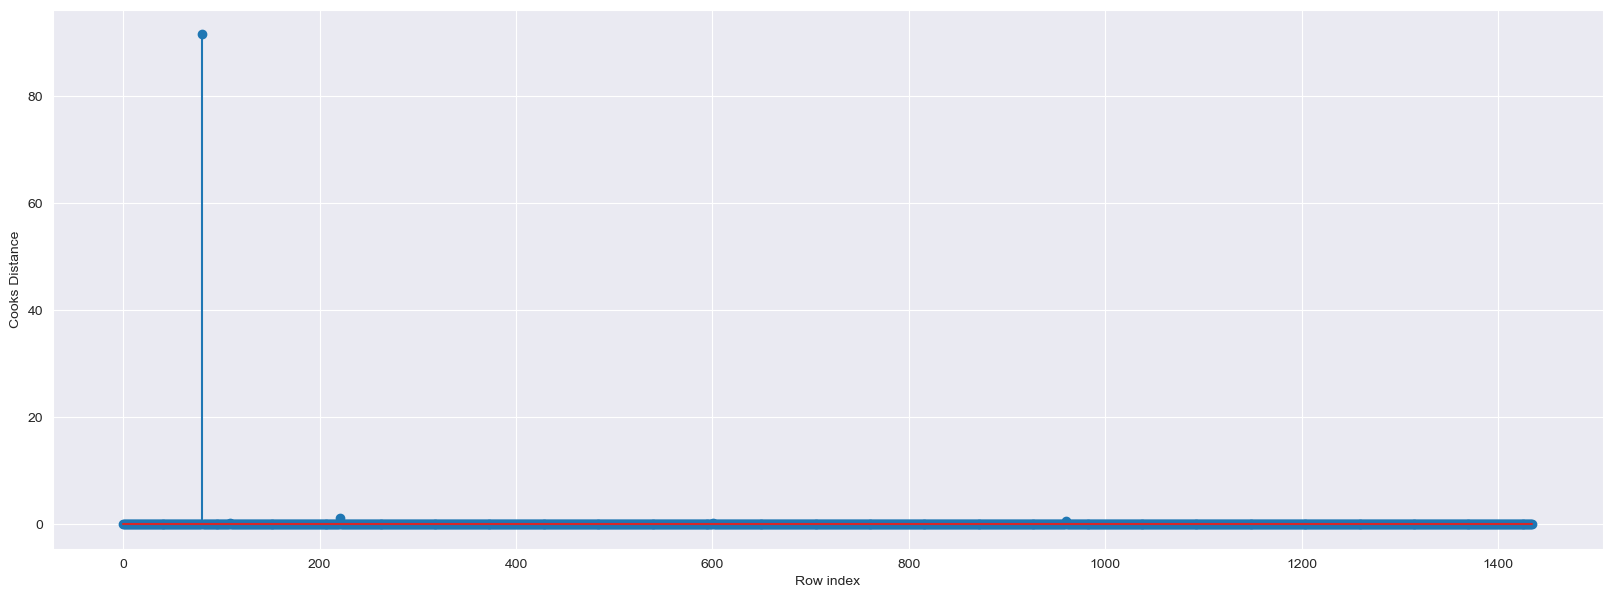

In [13]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [14]:
(np.argmax(c), np.max(c))

(80, 91.60492711467967)

In [15]:
corolla.iloc[[80],:]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [16]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [17]:
corolla1 = corolla.drop(corolla.index[[80]], axis=0).reset_index()
corolla1 = corolla1.drop(['index'], axis=1)
corolla1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [18]:
model4 = smf.ols('Price ~Age_08_04 + KM + HP + cc + Doors +  Quarterly_Tax + Weight ', data = corolla1).fit()
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1349.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:35:17   Log-Likelihood:                -12338.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3811.9846   1043.223     -3.654      0.000   -5858.400   -1765.569
Age_08_04      -120.5554      2.567    -46.961      0.000    -125.591    -115.520
KM               -0.0176      0.001    -13.761      0.000      -0.020      -0.015
HP               41.2637      2.831     14.577      0.000      35.711      46.816
cc               -2.5635      0.308     -8.334      0.000      -3.167      -1.960
Doors           -47.7725     38.592     -1.238      0.216    -123.475      27.930
Quarterly_Tax     9.2725      1.425      6.505      0.000       6.476      12.069
Weight           20.2365      1.118     18.104      0.000      18.044      22.429
==============================================================================
Omnibus:                      251.507   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2744.218
Skew:                          -0.464   Prob(JB):                         0.00
Kurtosis:                       9.711   Cond. No.                     2.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model4_influence = model4.get_influence()
(c_2, _) = model4_influence.cooks_distance
c_2

array([7.66974503e-03, 4.15239971e-03, 5.60013609e-03, ...,
       3.31236308e-06, 1.00545721e-03, 1.06566799e-02])

In [20]:
len(c_2)

1435

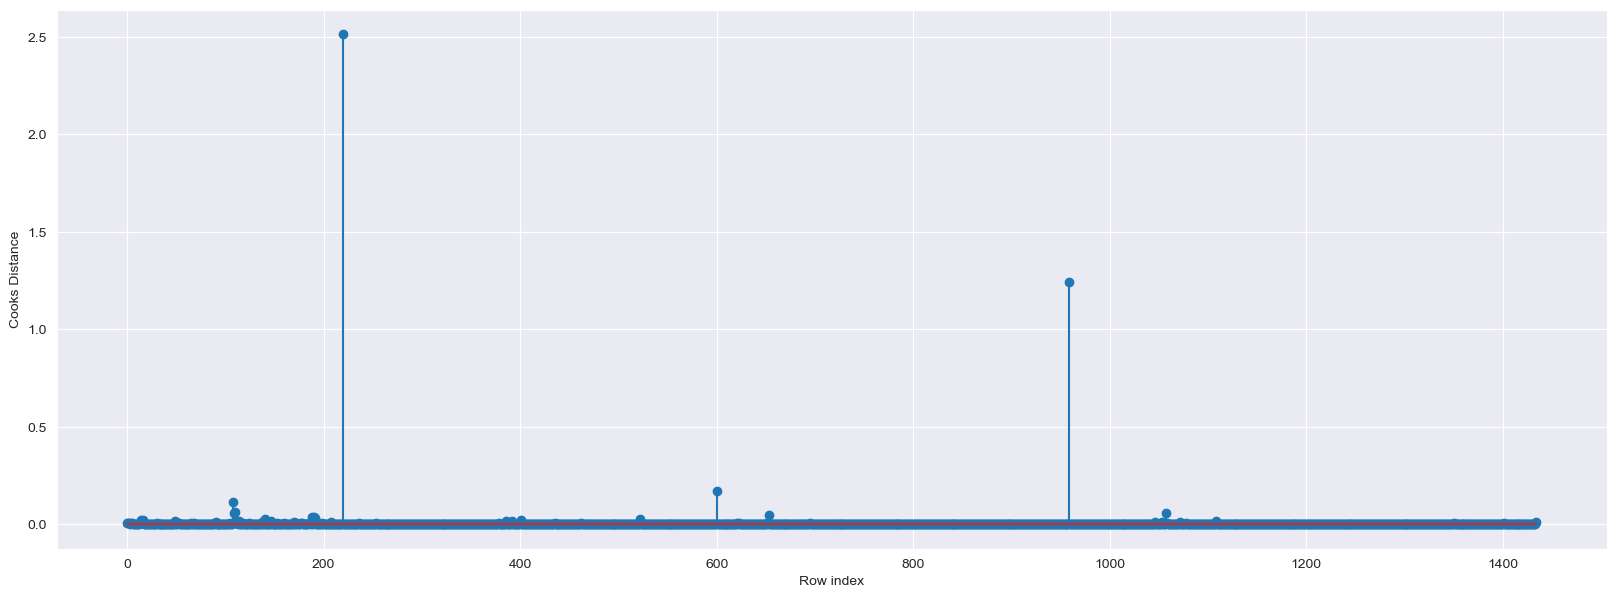

In [21]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla1)),np.round(c_2,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [22]:
(np.argmax(c_2), np.max(c_2))

(220, 2.5136087647644554)

In [23]:
corolla2 = corolla1.drop(corolla1.index[[220]], axis=0).reset_index()
corolla2 = corolla2.drop(['index'], axis=1)
corolla2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [24]:
model5 = smf.ols('Price ~Age_08_04 + KM + HP + cc + Doors +  Quarterly_Tax + Weight ', data = corolla2).fit()
model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1456.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:35:23   Log-Likelihood:                -12282.
No. Observations:                1434   AIC:                         2.458e+04
Df Residuals:                    1426   BIC:                         2.462e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7985.9559   1092.061     -7.313      0.000   -1.01e+04   -5843.737
Age_08_04      -116.6499      2.513    -46.412      0.000    -121.580    -111.720
KM               -0.0170      0.001    -13.767      0.000      -0.019      -0.015
HP               41.0671      2.738     15.001      0.000      35.697      46.437
cc               -3.2457      0.305    -10.635      0.000      -3.844      -2.647
Doors           -84.5911     37.504     -2.256      0.024    -158.160     -11.022
Quarterly_Tax     8.1719      1.383      5.909      0.000       5.459      10.885
Weight           25.1419      1.187     21.174      0.000      22.813      27.471
==============================================================================
Omnibus:                      200.644   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1777.432
Skew:                          -0.333   Prob(JB):                         0.00
Kurtosis:                       8.413   Cond. No.                     2.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model5_influence = model5.get_influence()
(c_3, _) = model5_influence.cooks_distance
c_3

array([7.86422106e-03, 4.24992535e-03, 5.69813133e-03, ...,
       3.66908641e-06, 1.07135243e-03, 1.39289861e-02])

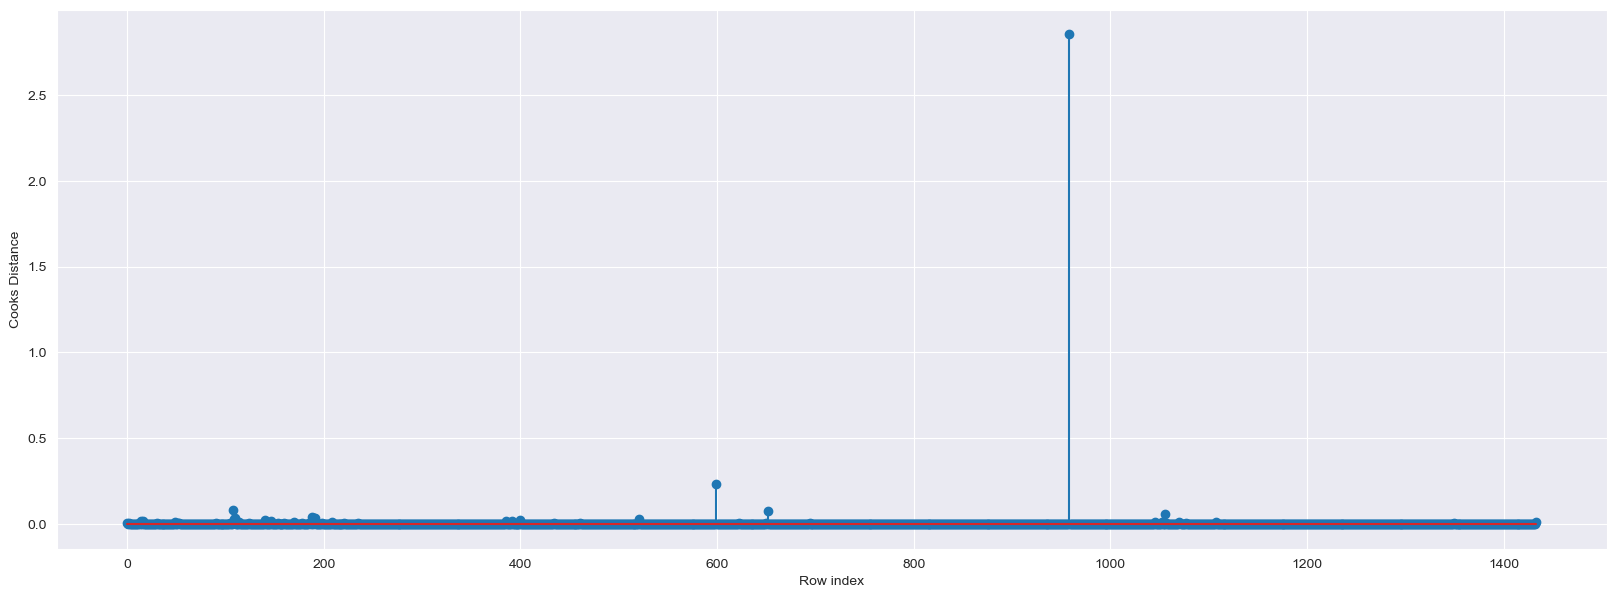

In [26]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla2)),np.round(c_3,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c_3), np.max(c_3))

(958, 2.852513392594247)

In [28]:
corolla3 = corolla2.drop(corolla2.index[[220]], axis=0).reset_index()
corolla3 = corolla3.drop(['index'], axis=1)
corolla3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [29]:
model6 = smf.ols('Price ~Age_08_04 + KM + HP + cc + Doors +  Quarterly_Tax + Weight ', data = corolla3).fit()
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1455.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:35:35   Log-Likelihood:                -12274.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1425   BIC:                         2.461e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7973.4446   1092.485     -7.298      0.000   -1.01e+04   -5830.394
Age_08_04      -116.7034      2.515    -46.396      0.000    -121.638    -111.769
KM               -0.0170      0.001    -13.747      0.000      -0.019      -0.015
HP               41.0923      2.739     15.005      0.000      35.720      46.464
cc               -3.2447      0.305    -10.629      0.000      -3.844      -2.646
Doors           -83.9423     37.527     -2.237      0.025    -157.556     -10.329
Quarterly_Tax     8.1725      1.383      5.908      0.000       5.459      10.886
Weight           25.1261      1.188     21.151      0.000      22.796      27.456
==============================================================================
Omnibus:                      200.210   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1767.225
Skew:                          -0.333   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     2.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

since there is no change in rsqaured value we stop here and finalize model6 as final model 

In [30]:
pred = model6.predict(corolla)
pred

0       16489.565764
1       16048.792942
2       16462.457225
3       16122.232922
4       15942.405416
            ...     
1431     9007.252788
1432     8432.106189
1433     8582.507468
1434     8700.909364
1435    10211.769825
Length: 1436, dtype: float64

# Q2)Prepare a prediction model for profit of 50_startups data.

In [31]:
Data=pd.read_csv('50_Startups.csv')
Data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
Data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [36]:
Data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [42]:
Data['State'] = Data['State'].astype('category')  
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.9 KB


In [41]:
Data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [52]:
Data.rename(columns={'R&D Spend': 'RD_spend'}, inplace=True)
Data.rename(columns={'Marketing Spend': 'Marketing_spend'}, inplace=True)
Data

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [55]:
model = smf.ols('Profit ~ RD_spend + Administration + Marketing_spend ', data = Data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.34e-27
Time:                        22:56:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RD_spend              0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model2 = smf.ols('Profit ~ RD_spend + Administration + Marketing_spend + State ', data = Data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.34e-27
Time:                        22:59:59   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RD_spend              0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([7.67941279e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
       1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
       7.29467177e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
       2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
       1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
       7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
       5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
       1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003185e-06,
       6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
       5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
       2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
       1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
       1.56376134e-01, 2.63959436e-01])

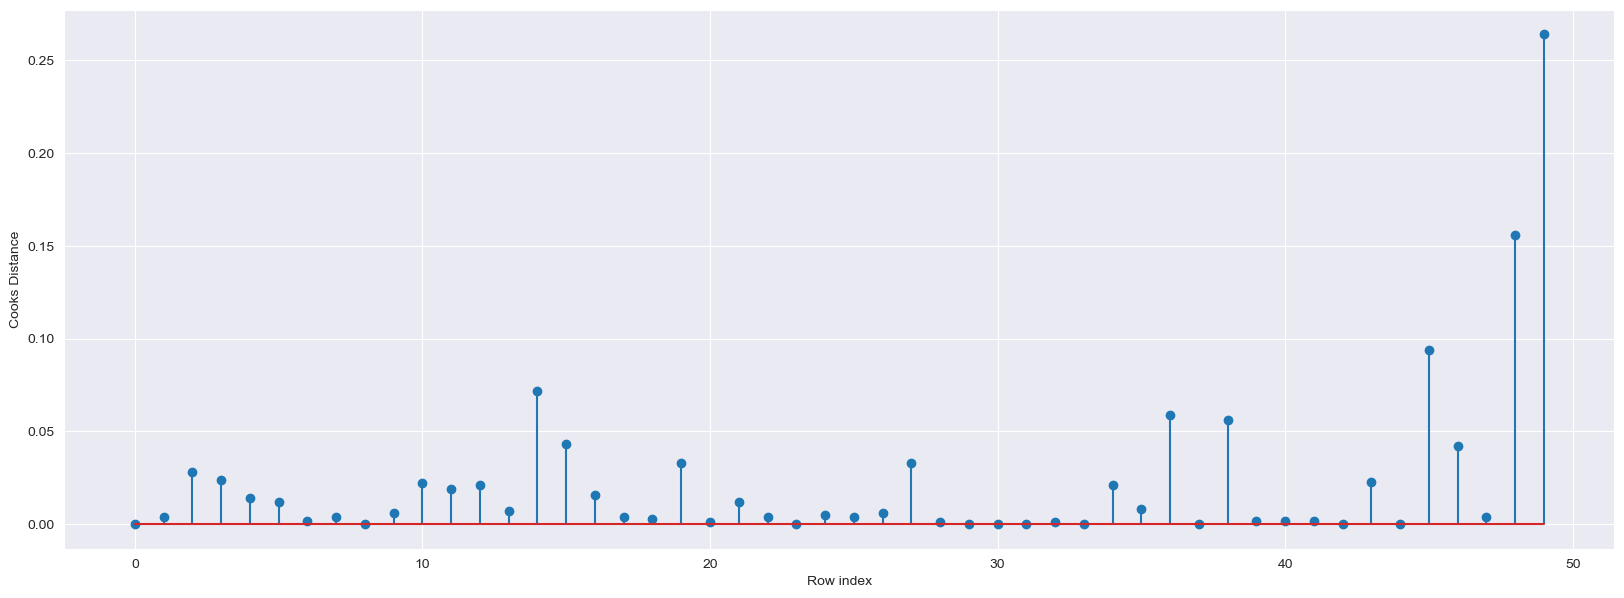

In [63]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
(np.argmax(c), np.max(c))

(49, 0.2639594358712928)

In [68]:
Data.iloc[[49],:]

,RD_spend,Administration,Marketing_spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [66]:
Data1 = Data.drop(Data.index[[49]], axis=0).reset_index()
Data1 = Data1.drop(['index'], axis=1)
Data1

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [69]:
model3 = smf.ols('Profit ~ RD_spend + Administration + Marketing_spend ', data = Data1).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           8.85e-32
Time:                        23:05:38   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_spend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
pred = model3.predict(Data)
pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
49     50925.119153


In [72]:
model3.resid

0      1545.153001
1      4254.937773
2     10474.863604
3     10440.845358
4     -4675.546721
5     -5591.463177
6     -1618.828633
7     -3595.135318
8       882.943059
9     -4476.886778
10    10614.157318
11     8786.544379
12    12229.920551
13     6527.220861
14   -16692.754796
15   -16020.901975
16     9555.302079
17    -5038.256295
18    -4862.334457
19     6135.856879
20     1376.298134
21    -6597.999038
22    -4895.967796
23    -1869.149045
24    -5499.033877
25     4006.285615
26    -5814.098935
27    -9907.855026
28      255.150566
29    -2052.981761
30     -718.820227
31    -1604.653693
32    -2897.901335
33    -2183.383136
34     6160.492191
35     4770.221328
36    13627.635745
37     -773.363244
38     9796.038044
39    -4141.615646
40     1614.399697
41     1306.684825
42     -993.904974
43     7166.930282
44    -1825.401107
45    14468.782794
46    -8847.693625
47    -6816.046655
48   -15984.686812
dtype: float64